# Importing the data

In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('Chennai houseing sale.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [2]:
data.shape

(7109, 22)

In [3]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [4]:
def index_column(d):
    for i in range(d.shape[1]):
        print(i,' ',d.columns[i])

In [5]:
index_column(data)

0   PRT_ID
1   AREA
2   INT_SQFT
3   DATE_SALE
4   DIST_MAINROAD
5   N_BEDROOM
6   N_BATHROOM
7   N_ROOM
8   SALE_COND
9   PARK_FACIL
10   DATE_BUILD
11   BUILDTYPE
12   UTILITY_AVAIL
13   STREET
14   MZZONE
15   QS_ROOMS
16   QS_BATHROOM
17   QS_BEDROOM
18   QS_OVERALL
19   REG_FEE
20   COMMIS
21   SALES_PRICE


In [6]:
data=data.iloc[:,[1,2,4,5,6,9,11,13,21]]
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,Yes,Commercial,Paved,7600000
1,Anna Nagar,1986,26,2.0,1.0,No,Commercial,Gravel,21717770
2,Adyar,909,70,1.0,1.0,Yes,Commercial,Gravel,13159200
3,Velachery,1855,14,3.0,2.0,No,Others,Paved,9630290
4,Karapakkam,1226,84,1.0,1.0,Yes,Others,Gravel,7406250


In [7]:
index_column(data)

0   AREA
1   INT_SQFT
2   DIST_MAINROAD
3   N_BEDROOM
4   N_BATHROOM
5   PARK_FACIL
6   BUILDTYPE
7   STREET
8   SALES_PRICE


# Data cleaning

## 1.) Null values

In [8]:
data.shape

(7109, 9)

In [9]:
data.isna().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
PARK_FACIL       0
BUILDTYPE        0
STREET           0
SALES_PRICE      0
dtype: int64

In [10]:
# Removing the rows having null values:
data.dropna(inplace=True)
data.shape

(7103, 9)

## 2.) Column values

In [11]:
data.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
PARK_FACIL        object
BUILDTYPE         object
STREET            object
SALES_PRICE        int64
dtype: object

### Column: AREA

In [12]:
data['AREA'].value_counts()

Chrompet      1679
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     780
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [13]:
# Replacing the values:

data['AREA'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'},inplace=True)

In [14]:
data['AREA'].value_counts()

Chrompet      1699
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     785
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

### Column: N_BEDROOM and N_BATHROOM

In [15]:
# Changing the data types of those 2 columns

data=data.astype({'N_BEDROOM':'int','N_BATHROOM':'int'})

In [16]:
data.dtypes

AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int32
N_BATHROOM        int32
PARK_FACIL       object
BUILDTYPE        object
STREET           object
SALES_PRICE       int64
dtype: object

### Column: PARK_FACIL

In [17]:
data['PARK_FACIL'].value_counts()

Yes    3584
No     3517
Noo       2
Name: PARK_FACIL, dtype: int64

In [18]:
data['PARK_FACIL'].replace({'Yes':1,'No':0,'Noo':0},inplace=True)
data['PARK_FACIL'].value_counts()

1    3584
0    3519
Name: PARK_FACIL, dtype: int64

In [19]:
data.dtypes

AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int32
N_BATHROOM        int32
PARK_FACIL        int64
BUILDTYPE        object
STREET           object
SALES_PRICE       int64
dtype: object

### Column: BUILDTYPE

In [20]:
data['BUILDTYPE'].value_counts()

House         2443
Commercial    2325
Others        2305
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [21]:
data['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'},inplace=True)
data['BUILDTYPE'].value_counts()

House         2443
Others        2331
Commercial    2329
Name: BUILDTYPE, dtype: int64

### Column: STREET

In [22]:
data['STREET'].value_counts()

Paved        2558
Gravel       2518
No Access    2008
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [23]:
data['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'},inplace=True)
data['STREET'].value_counts()

Paved        2570
Gravel       2518
No Access    2015
Name: STREET, dtype: int64

In [24]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,PARK_FACIL,BUILDTYPE,STREET,SALES_PRICE
0,Karapakkam,1004,131,1,1,1,Commercial,Paved,7600000
1,Anna Nagar,1986,26,2,1,0,Commercial,Gravel,21717770
2,Adyar,909,70,1,1,1,Commercial,Gravel,13159200
3,Velachery,1855,14,3,2,0,Others,Paved,9630290
4,Karapakkam,1226,84,1,1,1,Others,Gravel,7406250


In [25]:
data.to_csv('chennai_price.csv')

# EDA

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

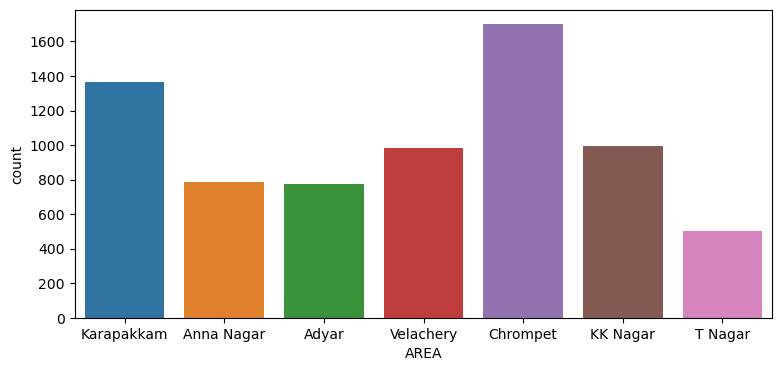

In [27]:
plt.figure(figsize=(9,4))
sns.countplot(x='AREA',data=data)
plt.show()

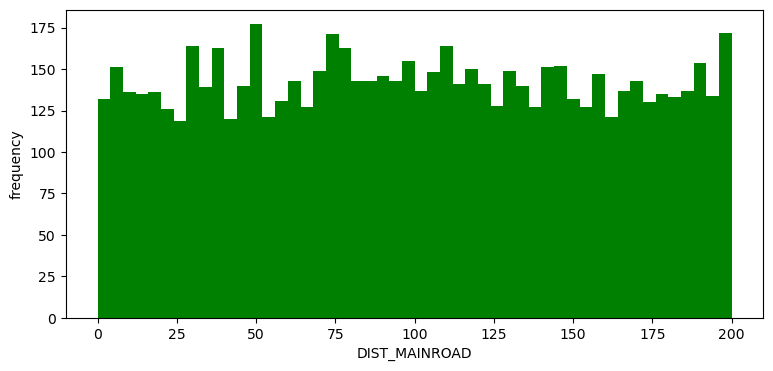

In [28]:
plt.figure(figsize=(9,4))
plt.hist(data['DIST_MAINROAD'],bins=50,color='g')
plt.xlabel('DIST_MAINROAD')
plt.ylabel('frequency')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


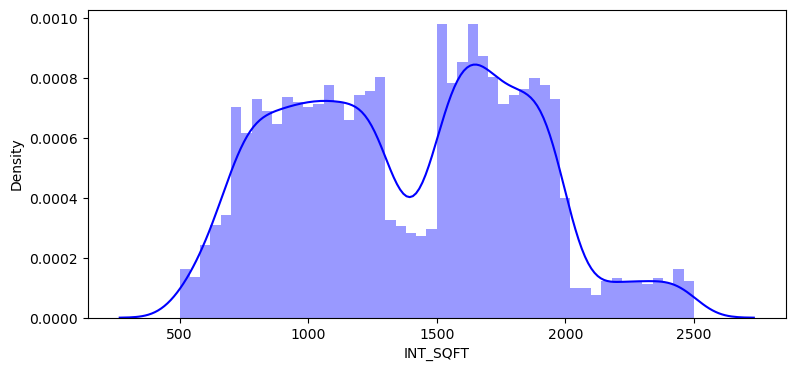

In [29]:
plt.figure(figsize=(9,4))
sns.distplot(data['INT_SQFT'],bins=50,color='b')
plt.show()

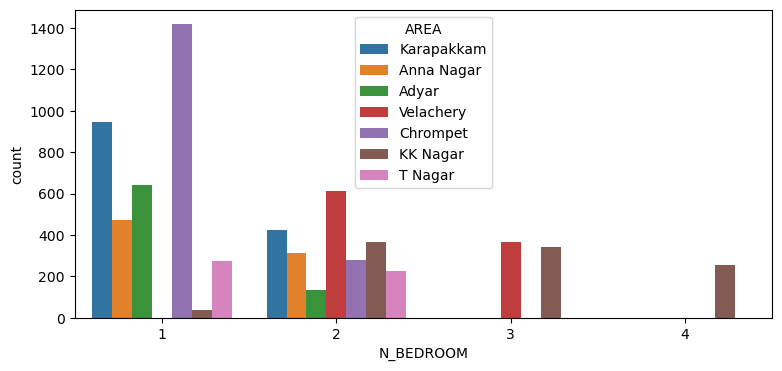

In [30]:
plt.figure(figsize=(9,4))
sns.countplot(x='N_BEDROOM',data=data,hue='AREA')
plt.show()

In [31]:
data['N_BEDROOM'].value_counts()

1    3791
2    2351
3     707
4     254
Name: N_BEDROOM, dtype: int64

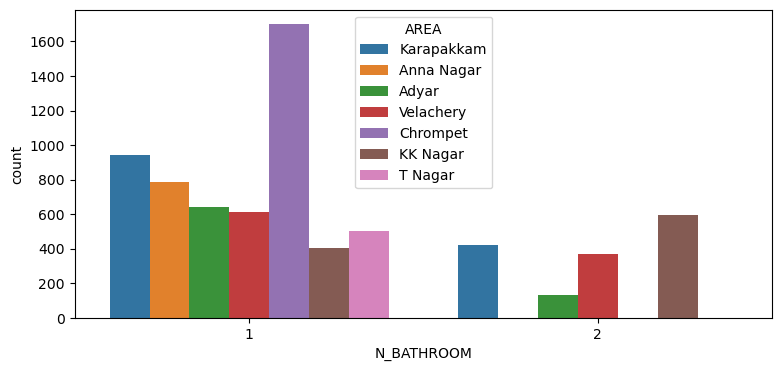

In [32]:
plt.figure(figsize=(9,4))
sns.countplot(x='N_BATHROOM',data=data,hue='AREA')
plt.show()

In [33]:
data['N_BATHROOM'].value_counts()

1    5588
2    1515
Name: N_BATHROOM, dtype: int64

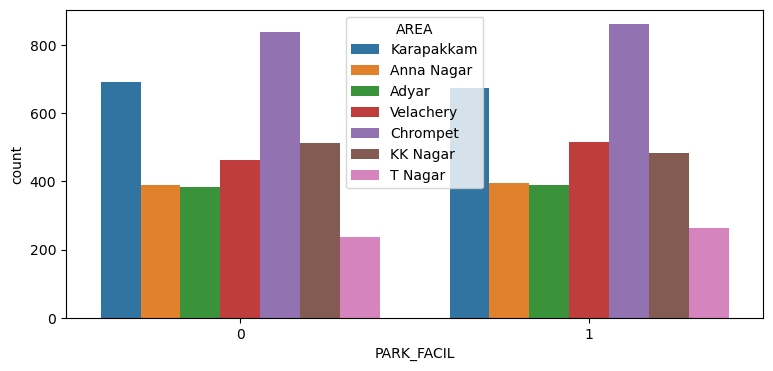

In [34]:
plt.figure(figsize=(9,4))
sns.countplot(x='PARK_FACIL',data=data,hue='AREA')
plt.show()

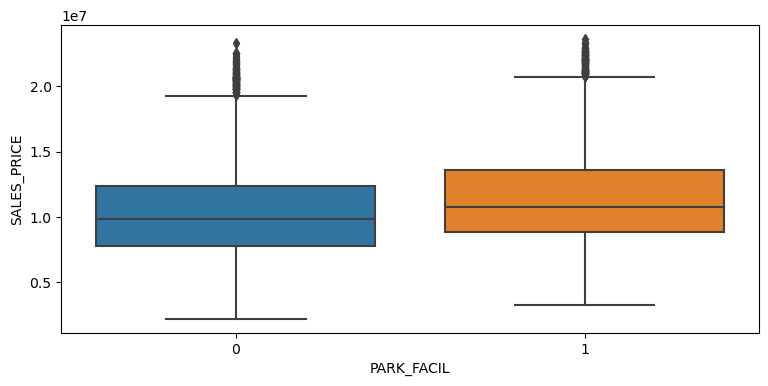

In [35]:
plt.figure(figsize=(9,4))
sns.boxplot(x='PARK_FACIL',y='SALES_PRICE',data=data)
plt.show()

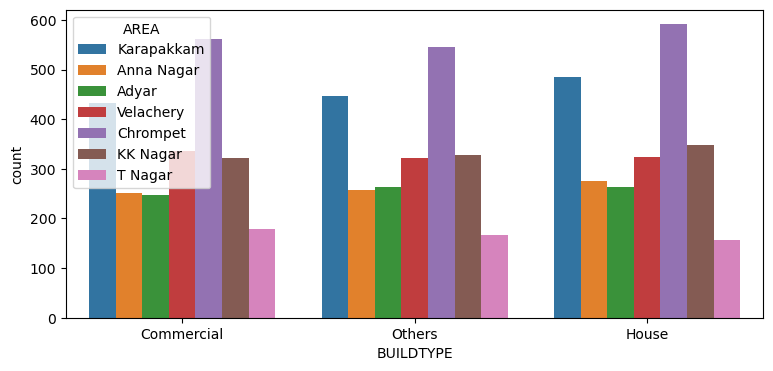

In [36]:
plt.figure(figsize=(9,4))
sns.countplot(x='BUILDTYPE',data=data,hue='AREA')
plt.show()

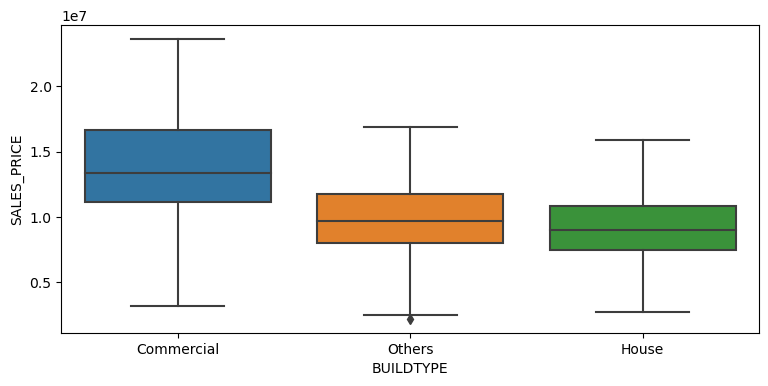

In [37]:
plt.figure(figsize=(9,4))
sns.boxplot(x='BUILDTYPE',y='SALES_PRICE',data=data)
plt.show()

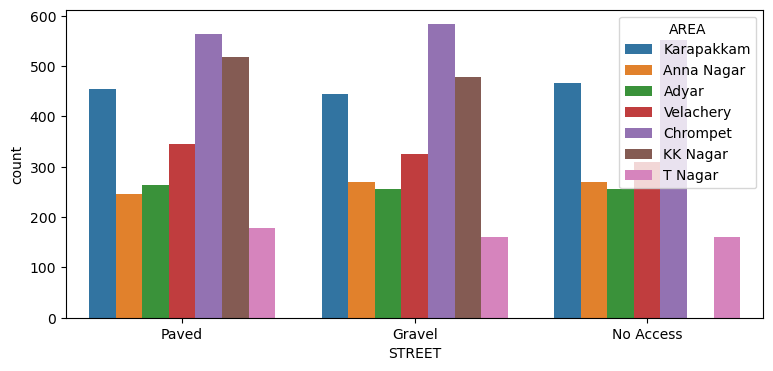

In [38]:
plt.figure(figsize=(9,4))
sns.countplot(x='STREET',data=data,hue='AREA')
plt.show()

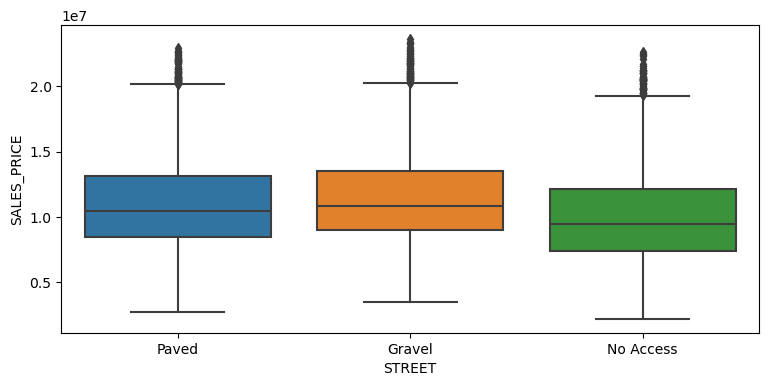

In [39]:
plt.figure(figsize=(9,4))
sns.boxplot(x='STREET',y='SALES_PRICE',data=data)
plt.show()

# Outliers : column: N_BEDROOM

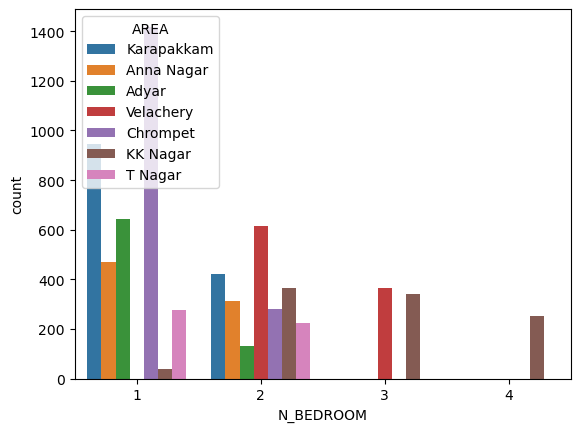

In [40]:
# plt.figure(figsize=(9,4))
sns.countplot(x='N_BEDROOM',data=data,hue='AREA')
plt.show()

In [41]:
def remove(col,df):
    df_out=pd.DataFrame()
 
    m=np.mean(col)
    st=np.std(col)
 
    reduced_df=df[(col>(m-st))&(col<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
 
    return df_out

In [42]:
data=remove(data['N_BEDROOM'],data)

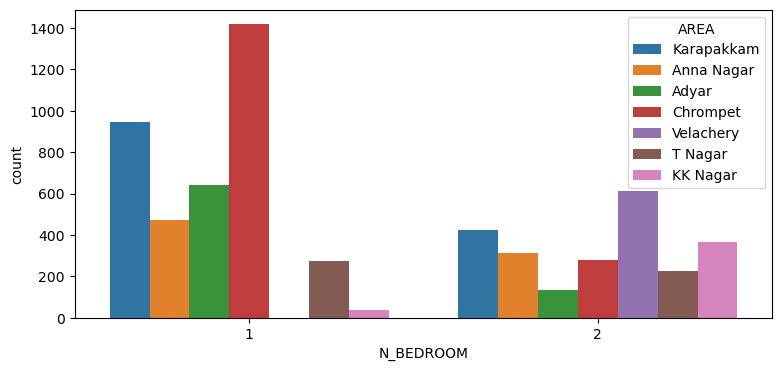

In [43]:
plt.figure(figsize=(9,4))
sns.countplot(x='N_BEDROOM',data=data,hue='AREA')
plt.show()

# Data Preparation:

## Column DataTypes

In [44]:
data.dtypes

AREA             object
INT_SQFT          int64
DIST_MAINROAD     int64
N_BEDROOM         int32
N_BATHROOM        int32
PARK_FACIL        int64
BUILDTYPE        object
STREET           object
SALES_PRICE       int64
dtype: object

### Column: AREA

In [45]:
df1=pd.get_dummies(data['AREA'])
df1.head()

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0


### Column: BUILDTYPE

In [46]:
df2=pd.get_dummies(data['BUILDTYPE'])
df2.head()

,Commercial,House,Others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


### Column: STREET

In [47]:
df3=pd.get_dummies(data['STREET'])
df3.head()

,Gravel,No Access,Paved
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0


In [48]:
df4=data.iloc[:,[1,2,3,4,5,8]]
df4.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,PARK_FACIL,SALES_PRICE
0,1004,131,1,1,1,7600000
1,1986,26,2,1,0,21717770
2,909,70,1,1,1,13159200
3,1226,84,1,1,1,7406250
4,1220,36,2,1,0,12394750


In [49]:
data=pd.concat([df1,df4,df2,df3],axis='columns')
data.head()

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,PARK_FACIL,SALES_PRICE,Commercial,House,Others,Gravel,No Access,Paved
0,0,0,0,0,1,0,0,1004,131,1,1,1,7600000,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1986,26,2,1,0,21717770,1,0,0,1,0,0
2,1,0,0,0,0,0,0,909,70,1,1,1,13159200,1,0,0,1,0,0
3,0,0,0,0,1,0,0,1226,84,1,1,1,7406250,0,0,1,1,0,0
4,0,0,1,0,0,0,0,1220,36,2,1,0,12394750,1,0,0,0,1,0


# Model Creation:

## X and Y declaration

In [50]:
x=data.drop(['SALES_PRICE'],axis='columns')
x.head()

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,PARK_FACIL,Commercial,House,Others,Gravel,No Access,Paved
0,0,0,0,0,1,0,0,1004,131,1,1,1,1,0,0,0,0,1
1,0,1,0,0,0,0,0,1986,26,2,1,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,909,70,1,1,1,1,0,0,1,0,0
3,0,0,0,0,1,0,0,1226,84,1,1,1,0,0,1,1,0,0
4,0,0,1,0,0,0,0,1220,36,2,1,0,1,0,0,0,1,0


In [51]:
y=data['SALES_PRICE']
y.head()

0     7600000
1    21717770
2    13159200
3     7406250
4    12394750
Name: SALES_PRICE, dtype: int64

## Splitting the dataset into training and testing data

In [52]:
from sklearn.model_selection import train_test_split as tts

xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=45)

## creating the model

In [53]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(xtrain,ytrain)

LinearRegression()

## Predicting the price

In [54]:
ypredict=model.predict(xtest)

## accuracy score

In [55]:
model.score(xtest,ytest)

0.9086289331756695

## Comparing actual vs predicted

In [56]:
print(ytest)

4140    12144500
3184    12149050
2813    20938520
5940    10842880
4285     8602800
          ...   
5366    10199620
4950     6583500
1160     2476375
5823    13263370
453     12146740
Name: SALES_PRICE, Length: 1229, dtype: int64


In [57]:
print(ypredict)

[11704470.6578006  13241467.96632484 18539626.98271959 ...
  3123536.67484207 14257896.67441119 13043226.83809668]


#### Now let us plot the comparison of Actual and Predicted values.

In [58]:
comp_tab=pd.DataFrame({'Actual_value':ytest,'Predicted_value':ypredict})
comp_tab.head()

,Actual_value,Predicted_value
4140,12144500,1.170447e+07
3184,12149050,1.324147e+07
2813,20938520,1.853963e+07
5940,10842880,1.012195e+07
4285,8602800,9.318799e+06


In [59]:
def comp_plot(df):
    df.plot(kind='bar',figsize=(20,5))
    plt.grid(True)
    plt.show()

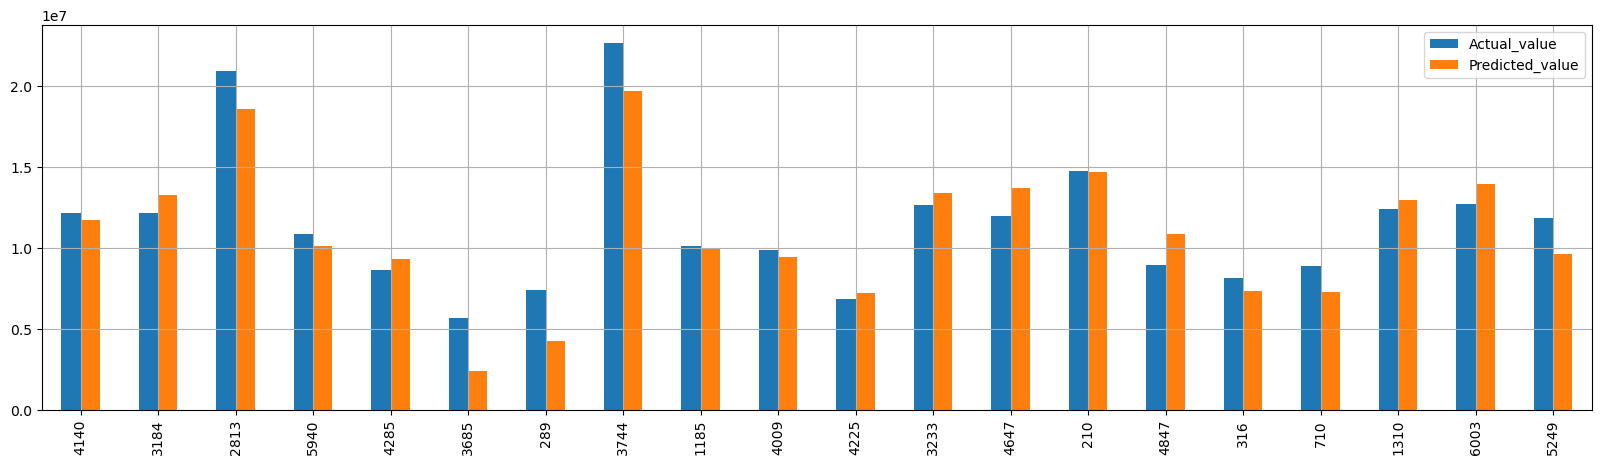

In [60]:
comp_plot(comp_tab.head(20))

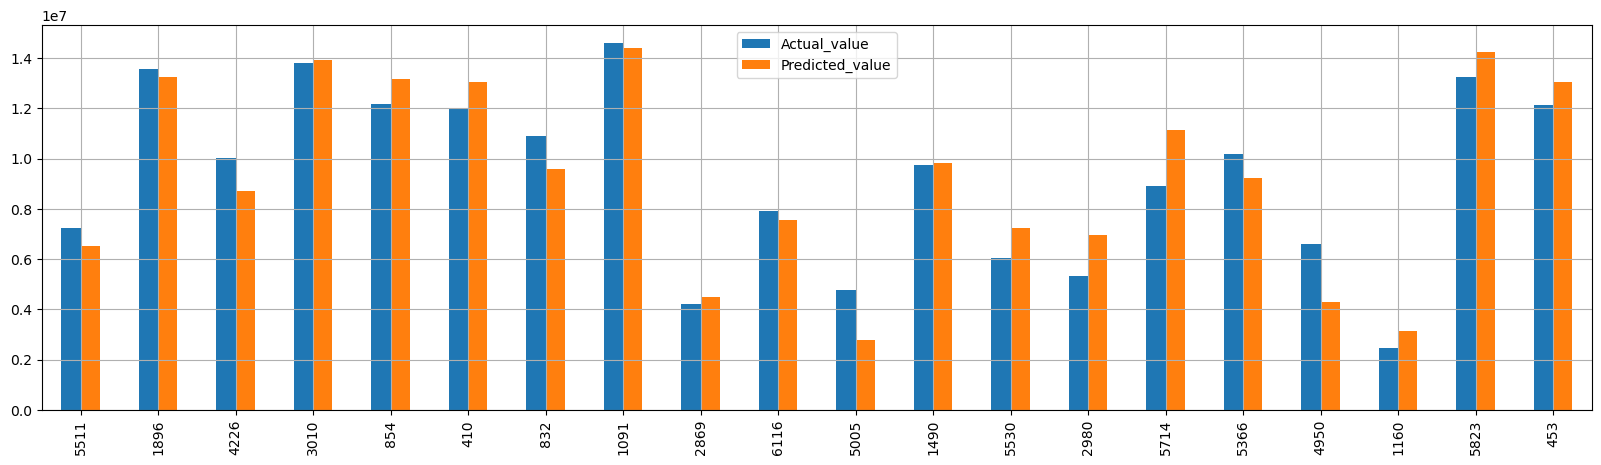

In [61]:
comp_plot(comp_tab.tail(20))

# Prediction

In [62]:
x.columns

Index(['Adyar', 'Anna Nagar', 'Chrompet', 'KK Nagar', 'Karapakkam', 'T Nagar',
       'Velachery', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'PARK_FACIL', 'Commercial', 'House', 'Others', 'Gravel', 'No Access',
       'Paved'],
      dtype='object')

In [63]:
def price_prediction(area,sqft,dist,bed,bath,park,buildtype,street):
    
    area_index=np.where(x.columns==area)[0][0]
    buildtype_index=np.where(x.columns==buildtype)[0][0]
    street_index=np.where(x.columns==street)[0][0]
    
    a=np.zeros(len(x.columns))
    
    a[7]=sqft
    a[8]=dist
    a[9]=bed
    a[10]=bath
    a[11]=park
    
    if area_index>=0:
        a[area_index]=1
        
    if buildtype_index>=0:
        a[buildtype_index]=1
        
    if street_index>=0:
        a[street_index]=1
        
    return model.predict([a])[0]

In [64]:
price_prediction('Adyar',1500,120,2,2,1,'House','Paved')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10461864.40129795

In [65]:
price_prediction('Chrompet',2000,50,2,1,0,'House','Paved')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12557574.942647718